In [1]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np
from collections import Counter

g = nx.grid_graph([10,10])

g = nx.karate_club_graph()

shape = False

nlist = list(g.nodes())
n = len(nlist)

shuffle = True

num_steps = 100


pos = nx.kamada_kawai_layout(g)
if shape:
    pos = {node:(c_x[node],c_y[node]) for node in g.nodes}


k = 4

for n in nlist:
    g.nodes[n]["cddict"] = random.choice(range(k))
    
plots = [[] for x in range(k)]    

for step in range(num_steps):
    new_assignment = {x:-1 for x in g.nodes()}
    
    if shuffle:
        random.shuffle(nlist)
        for n in nlist:
            nassn = [g.nodes[neighbor]["cddict"] for neighbor in g.neighbors(n)]
            ncount = Counter(nassn)
        
            nmax = max(ncount.values())
            nchoose = []
            for j in range(k):
                if j in nassn:
                    if ncount[j] == nmax:
                        nchoose.append(j)
            
            new_assignment[n] = random.choice(nchoose)
        
    else:
        for n in nlist:
            nassn = [g.nodes[neighbor]["cddict"] for neighbor in g.neighbors(n)]
            ncount = Counter(nassn)
            nmax = max(ncount.values())
            nchoose = []
            for j in range(k):
                if j in nassn:
                    if ncount[j] == nmax:
                        nchoose.append(j)
            
            new_assignment[n] = random.choice(nchoose)
        
    allcount = Counter(list(new_assignment.values()))   
    for j in range(k):
        if j in allcount.keys():
            plots[j].append(allcount[j])
        else:
            plots[j].append(0)
    if new_assignment == {n:g.nodes[x]["cddict"] for x in nlist}:
        print("Converged")
        break
        
    
    for n in nlist:
        g.nodes[n]["cddict"] = new_assignment[n]
        
    nx.draw(g,pos=pos,node_color=[g.nodes[x]["cddict"] for x in nlist],cmap ='jet')
    plt.savefig(f"output_images/step{step:03d}.png")
    plt.close()
    if shape:
        df["infect"] = df.index.map({x:g.nodes[x]["cddict"] for x in nlist})
        df.plot(column = "infect")
        plt.savefig(f"output_images/dfstep{step:03d}.png")
        plt.close()
    
    
cmap = matplotlib.cm.get_cmap('tab20')

plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

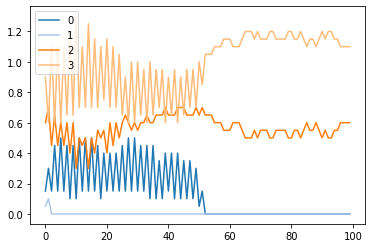

In [2]:
for i in range(k):
    try:
        plt.plot([x/n for x in plots[i]],color = cmap(i),label=str(i))  
    except:
        pass
plt.legend()
plt.savefig(f"output_images/dfstep{step:03d}.png")
plt.close()

plt.figure()
for i in range(k):
    plt.plot([x/n for x in plots[i]],color = cmap(i),label=str(i))  
plt.legend()
plt.show()